<a href="https://colab.research.google.com/github/JimStrawberry/AI/blob/master/Decision_Tree_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
from math import log
import operator
import pickle
import numpy as np

In [2]:
def createDataSet():
  dataSet = [[0, 0, 0, 0, 'no'],
        [0, 0, 0, 1, 'no'],
        [0, 1, 0, 1, 'yes'],
        [0, 1, 1, 0, 'yes'],
        [0, 0, 0, 0, 'no'],
        [1, 0, 0, 0, 'no'],
        [1, 0, 0, 1, 'no'],
        [1, 1, 1, 1, 'yes'],
        [1, 0, 1, 2, 'yes'],
        [1, 0, 1, 2, 'yes'],
        [2, 0, 1, 2, 'yes'],
        [2, 0, 1, 1, 'yes'],
        [2, 1, 0, 1, 'yes'],
        [2, 1, 0, 2, 'yes'],
        [2, 0, 0, 0, 'no']]
  labels = ['F1-AGE', 'F2-WORK', 'F3-HOME', 'F4-LOAN']
  return dataSet, labels

In [5]:
def createTree(dataSet, labels, featLabels): # featLabels：the order of features after building the tree
  classList = [example[-1] for example in dataSet]
  if classList.count(classList[0]) == len(classList): # determine whether all the values are same
    return classList[0]
  if len(dataSet[0]) == 1: # determine whether it is the last feature
    return majorityCnt(classList) # return the majority class
  bestFeat = chooseBestFeatureToSplit(dataSet) # bestFeat should be 0,1,2,3.... index
  bestFeatLabel = labels[bestFeat] # find the feature name with index
  featLabels.append(bestFeatLabel)
  myTree = {bestFeatLabel:{}} # dictionary
  del labels[bestFeat] # delete the used feature
  featValues = [example[bestFeat] for example in dataSet]
  uniqueVals = set(featValues) # Extract unique feature values ​​from the featValues ​​list
  for value in uniqueVals:
    subLabels = labels[:]
    myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels, featLabels) # recursion
  return myTree


In [7]:
def majorityCnt(classList):
  classCount = {} # Used to count the number of times each category appears in classList
  for vote in classList:
    if vote not in classCount.keys():classCount[vote] = 0 # If not present, initialize to 0
    classCount[vote] += 1
  sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
  return sortedClassCount[0][0] # return the lable, like "yes" or "no"



In [8]:
def chooseBestFeatureToSplit(dataSet):
  numFeatures = len(dataSet[0]) - 1
  baseEntropy = calcShannonEnt(dataSet) # the entropy of the whole dataset
  bestInfoGain = 0.0 # initialization
  bestFeature = -1 # initialization
  for i in range(numFeatures):
    featList = [example[i] for example in dataSet] # category in the current feature
    uniqueVals = set(featList)
    newEntropy = 0.0
    for value in uniqueVals:
      subDataSet = splitDataSet(dataSet, i, value)
      prob = len(subDataSet)/float(len(dataSet))
      # for example, calculate the entropy sum of the following three values ​​for the weather feature.
      newEntropy += prob * calcShannonEnt(subDataSet)
    infoGain = baseEntropy - newEntropy # calculate information gain
    if infoGain > bestInfoGain:
      bestInfoGain = infoGain
      bestFeature = i
  return bestFeature


In [9]:
def calcShannonEnt(dataSet):
  numEntries = len(dataSet) # the number of all samples
  labelCounts = {}
  for featVec in dataSet:
    currentLabel = featVec[-1]
    if currentLabel not in labelCounts.keys():
      labelCounts[currentLabel] = 0
    labelCounts[currentLabel] += 1

  shannonEnt = 0.0
  for key in labelCounts:
    prob = float(labelCounts[key])/numEntries # Entropy calculation
    shannonEnt -= prob * log(prob, 2)
  return shannonEnt


In [10]:
'''
The data is divided according to the value of a specific feature from
the data set. It selects samples whose value of a certain feature in
the data set is equal to a given value, removes the feature, and generates
a new data subset.
for example:
  dataSet = [
    [1, 1, 'yes'],
    [1, 0, 'no'],
    [0, 1, 'no'],  # no need
    [0, 0, 'no']  # no need
  ]
=> splitDataSet(dataSet, 0, 1)
=> result: [[1, 'yes'], [0, 'no']]
'''
def splitDataSet(dataSet, axis, value):
  retDataSet = []
  for featVec in dataSet:
    if featVec[axis] == value:
      reducedFeatVec = featVec[:axis]
      reducedFeatVec.extend(featVec[axis+1:])
      retDataSet.append(reducedFeatVec)
  return retDataSet

In [11]:
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")


In [12]:
'''
The function is used to count the number of leaf nodes in a given
decision tree. Leaf nodes are terminal nodes in the tree that have
no child nodes and usually represent classification results. In decision
trees, leaf nodes are often specific classification labels.
'''
def getNumLeafs(myTree):
  numLeafs = 0
  firstStr = list(myTree.keys())[0]
  secondDict = myTree[firstStr]
  for key in secondDict.keys():
    if type(secondDict[key]).__name__ == 'dict':
      numLeafs += getNumLeafs(secondDict[key])
    else:
      numLeafs += 1
  return numLeafs


In [13]:
'''
The function is used to calculate the maximum depth of a given decision
tree. The depth of a decision tree is the number of layers in the
longest path from the root node to the farthest leaf node. The depth
increases by 1 for each layer down.
'''

def getTreeDepth(myTree):
  maxDepth = 0
  firstStr = list(myTree.keys())[0]
  secondDict = myTree[firstStr]
  for key in secondDict.keys():
    if type(secondDict[key]).__name__ == 'dict':
      thisDepth = 1 + getTreeDepth(secondDict[key])
    else:
      thisDepth = 1
    if thisDepth > maxDepth:
      maxDepth = thisDepth
  return maxDepth

In [14]:
'''
The function is used to draw nodes with arrows and borders, and is
often used to draw visualization diagrams of decision trees. The
function uses the annotate method of matplotlib to mark nodes and
draw arrows in the diagram.
'''
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
  arrow_args = dict(arrowstyle="<-")
  font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
  createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction', xytext=centerPt, textcoords='axes fraction', va
                          ="center", ha="center", bbox=nodeType, arrowprops=arrow_args)

In [15]:
'''
The function is used to draw text information between two nodes
of a decision tree, usually used to display the association
information or decision conditions between nodes.
'''
def plotMidText(cntrPt, parentPt, txtString):
  xMid = (parentPt[0] - cntrPt[0])/2.0 + cntrPt[0]
  yMid = (parentPt[1] - cntrPt[1])/2.0 + cntrPt[1]
  createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)


In [16]:
'''
The function is used to recursively draw a graphical visualization
of the entire decision tree. It traverses the entire tree structure
by recursively calling itself and draws node boxes and connecting
arrows at each node of the tree.
'''
def plotTree(myTree, parentPt, nodeTxt):
  decisionNode = dict(boxstyle="sawtooth", fc="0.8")
  leafNode = dict(boxstyle="round4", fc="0.8")
  numLeafs = getNumLeafs(myTree)
  depth = getTreeDepth(myTree)
  firstStr = list(myTree.keys())[0]
  cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
  plotMidText(cntrPt, parentPt, nodeTxt)
  plotNode(firstStr, cntrPt, parentPt, decisionNode)
  secondDict = myTree[firstStr]
  plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
  for key in secondDict.keys():
    if type(secondDict[key]).__name__ == 'dict':
      plotTree(secondDict[key], cntrPt, str(key))
    else:
      plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
      plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
      plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
  plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD


In [17]:
'''
The function is used to initialize the drawing interface and call
the plotTree function to draw the decision tree. It sets the basic
properties and parameters of the graph, calculates the width and depth
of the entire tree, and recursively draws all nodes and leaf nodes
of the decision tree by calling plotTree.
'''

def createPlot(inTree):
  fig = plt.figure(1, facecolor='white')
  fig.clf()
  axprops = dict(xticks=[], yticks=[])
  createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
  plotTree.totalW = float(getNumLeafs(inTree))
  plotTree.totalD = float(getTreeDepth(inTree))
  plotTree.xOff = -0.5/plotTree.totalW
  plotTree.yOff = 1.0
  plotTree(inTree, (0.5, 1.0), '')
  plt.show()

{'F3-HOME': {0: {'F2-WORK': {0: 'no', 1: 'yes'}}, 1: 'yes'}}


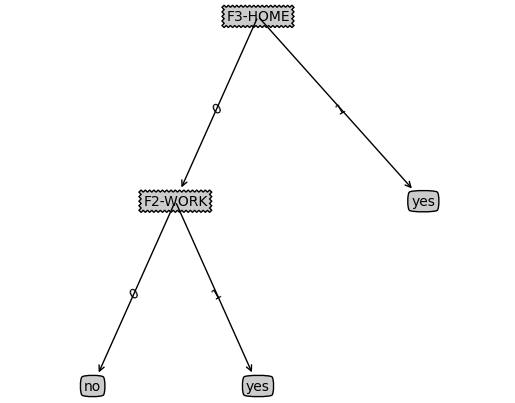

In [18]:
if __name__ == '__main__':
  dataSet, labels = createDataSet()
  featLabels = []
  myTree = createTree(dataSet, labels, featLabels)
  print(myTree)
  createPlot(myTree)
